In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

In [3]:
gm = GaussianMixture(n_components=2, random_state=0).fit(X)

In [4]:
gm.means_

array([[10.,  2.],
       [ 1.,  2.]])

In [5]:
gm.predict([[0, 0], [12, 3]])

array([1, 0])

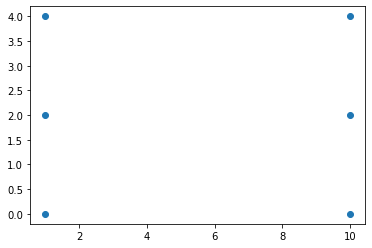

In [6]:
plt.scatter(X[:,0],X[:,1])

In [7]:
n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0.0, -0.7], [3.5, 0.7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

In [8]:
# fit a Gaussian Mixture Model with two components
clf = GaussianMixture(n_components=2, covariance_type="full")
clf.fit(X_train)

GaussianMixture(n_components=2)

In [9]:
# display predicted scores by the model as a contour plot
x = np.linspace(-20.0, 30.0)
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

/data/leuven/334/vsc33470/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  after removing the cwd from sys.path.


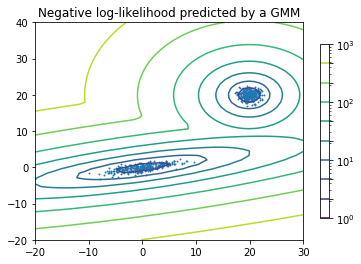

In [10]:
CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(X_train[:, 0], X_train[:, 1], 0.8)

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.show()

In [11]:
umi_counts = np.array([1,2,3,4])

In [12]:
umi_counts

array([1, 2, 3, 4])

In [13]:
log_umi = np.log(1. + umi_counts)
log_umi

array([0.69314718, 1.09861229, 1.38629436, 1.60943791])

In [14]:
""" Convert a 1-d array to a column vector """
log_umi2 = np.reshape(log_umi, (len(log_umi), 1))
log_umi2

array([[0.69314718],
       [1.09861229],
       [1.38629436],
       [1.60943791]])

In [15]:
umi_gmm = GaussianMixture(n_components=2).fit(log_umi2)
umi_gmm

GaussianMixture(n_components=2)

In [16]:
if not umi_gmm.converged_:
    sys.stdout.write("Warning: EM did not converge for UMIs!")

In [17]:
umi_posterior = umi_gmm.predict_proba(log_umi2)

In [18]:
umi_posterior

array([[8.26216979e-05, 9.99917378e-01],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00]])

In [19]:
umi_gmm.means_ # means of two distributions?

array([[1.36476302],
       [0.69314718]])

In [20]:
high_umi_component = np.argmax(umi_gmm.means_) # Returns the indices of the maximum values along an axis
in_high_umi_component = umi_posterior[:,high_umi_component] > 0.5 
in_high_umi_component

array([False,  True,  True,  True])

In [21]:
umi_thresholds = np.amin(umi_counts[in_high_umi_component])
umi_thresholds # min thresholds

2